In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose

import os

In [2]:
main_cwd = '/Users/yanting/OneDrive/Desktop/2023_11_18 Hackathon/2023_11_18-SE-Europe-Data_Challenge'
os.chdir(main_cwd)

os.chdir('./data')
df_main = pd.read_csv('processed_data.csv')
df_main.set_index('timestamp', inplace=True)
df_main.index = pd.to_datetime(df_main.index)
df_main.columns

Index(['SP_load_MAW', 'DE_B09_MAW', 'DE_B20_MAW', 'SE_load_MAW', 'NE_B20_MAW',
       'NE_B18_MAW', 'NE_B19_MAW', 'DK_load_MAW', 'DE_B18_MAW', 'DE_B19_MAW',
       ...
       'PO_green_surplus_MAW', 'HU_green_MAW', 'HU_green_surplus_MAW',
       'IT_green_MAW', 'IT_green_surplus_MAW', 'UK_green_MAW',
       'UK_green_surplus_MAW', 'max_surplus_country_name',
       'max_surplus_country_code', 'max_surplus_country_code_next_hr'],
      dtype='object', length=135)

In [121]:
country_labels = ['HU', 'IT', 'PO', 'SP', 'UK', 'DE', 'DK', 'SE', 'NE']
green_energy_types_list = ["B01", "B09", "B10", "B11", "B12", "B13", "B15", "B16", "B18", "B19"]

green_energy_types_dict = {
    'A03': 'Mixed',
    'A04': 'Generation',
    'A05': 'Load',
    'B01': 'Biomass',
    'B02': 'Fossil Brown coal/Lignite',
    'B03': 'Fossil Coal-derived gas',
    'B04': 'Fossil Gas',
    'B05': 'Fossil Hard coal',
    'B06': 'Fossil Oil',
    'B07': 'Fossil Oil shale',
    'B08': 'Fossil Peat',
    'B09': 'Geothermal',
    'B10': 'Hydro Pumped Storage',
    'B11': 'Hydro Run-of-river and poundage',
    'B12': 'Hydro Water Reservoir',
    'B13': 'Marine',
    'B14': 'Nuclear',
    'B15': 'Other renewable',
    'B16': 'Solar',
    'B17': 'Waste',
    'B18': 'Wind Offshore',
    'B19': 'Wind Onshore',
    'B20': 'Other',
    'B21': 'AC Link',
    'B22': 'DC Link',
    'B23': 'Substation',
    'B24': 'Transformer'
}

for country in country_labels:

    green_cols = [col for col in df_main.columns if country in col and col.split('_')[1] in green_energy_types_list]

    load_col = f"{country}_load_MAW"
    total_load = df_main[load_col].sum()

    green_col = f"{country}_green_MAW"
    total_green = df_main[green_col].sum()

    # Filter df_main by country
    df_country = df_main[green_cols].sum()
    # sort df_country descending
    df_sorted = df_country.sort_values(ascending=False)
    energy_type = df_sorted.index[0].split('_')[1]
    energy_name = green_energy_types_dict[energy_type]

    # Print the result
    print('- '*15)
    print(f"The highest green energy gen in {country} is {energy_type} = {energy_name}")
    print(f"= {100 * df_sorted[0] / total_green:.2f}% of green and {100 * df_sorted[0] / total_load:.2f}% of total")


- - - - - - - - - - - - - - - 
The highest green energy gen in HU is B16 = Solar
= 61.10% of green and 7.10% of total
- - - - - - - - - - - - - - - 
The highest green energy gen in IT is B11 = Hydro Run-of-river and poundage
= 27.68% of green and 8.04% of total
- - - - - - - - - - - - - - - 
The highest green energy gen in PO is B19 = Wind Onshore
= 57.79% of green and 10.89% of total
- - - - - - - - - - - - - - - 
The highest green energy gen in SP is B19 = Wind Onshore
= 50.34% of green and 24.92% of total
- - - - - - - - - - - - - - - 
The highest green energy gen in UK is B19 = Wind Onshore
= 100.00% of green and 30.23% of total
- - - - - - - - - - - - - - - 
The highest green energy gen in DE is B19 = Wind Onshore
= 41.14% of green and 20.84% of total
- - - - - - - - - - - - - - - 
The highest green energy gen in DK is B19 = Wind Onshore
= 41.77% of green and 30.65% of total
- - - - - - - - - - - - - - - 
The highest green energy gen in SE is B12 = Hydro Water Reservoir
= 67.47% o

In [54]:
relevant_cols = [col for col in df_main.columns if ('load' in col or 'green' in col or 'surplus' in col)]
df_simp = df_main[relevant_cols]

print(len(df_simp))
print(df_simp.columns)

8761
Index(['SP_load_MAW', 'SE_load_MAW', 'DK_load_MAW', 'PO_load_MAW',
       'NE_load_MAW', 'UK_load_MAW', 'IT_load_MAW', 'DE_load_MAW',
       'HU_load_MAW', 'SP_green_MAW', 'SP_green_surplus_MAW', 'DE_green_MAW',
       'DE_green_surplus_MAW', 'SE_green_MAW', 'SE_green_surplus_MAW',
       'NE_green_MAW', 'NE_green_surplus_MAW', 'DK_green_MAW',
       'DK_green_surplus_MAW', 'PO_green_MAW', 'PO_green_surplus_MAW',
       'HU_green_MAW', 'HU_green_surplus_MAW', 'IT_green_MAW',
       'IT_green_surplus_MAW', 'UK_green_MAW', 'UK_green_surplus_MAW',
       'max_surplus_country_name', 'max_surplus_country_code',
       'max_surplus_country_code_next_hr'],
      dtype='object')


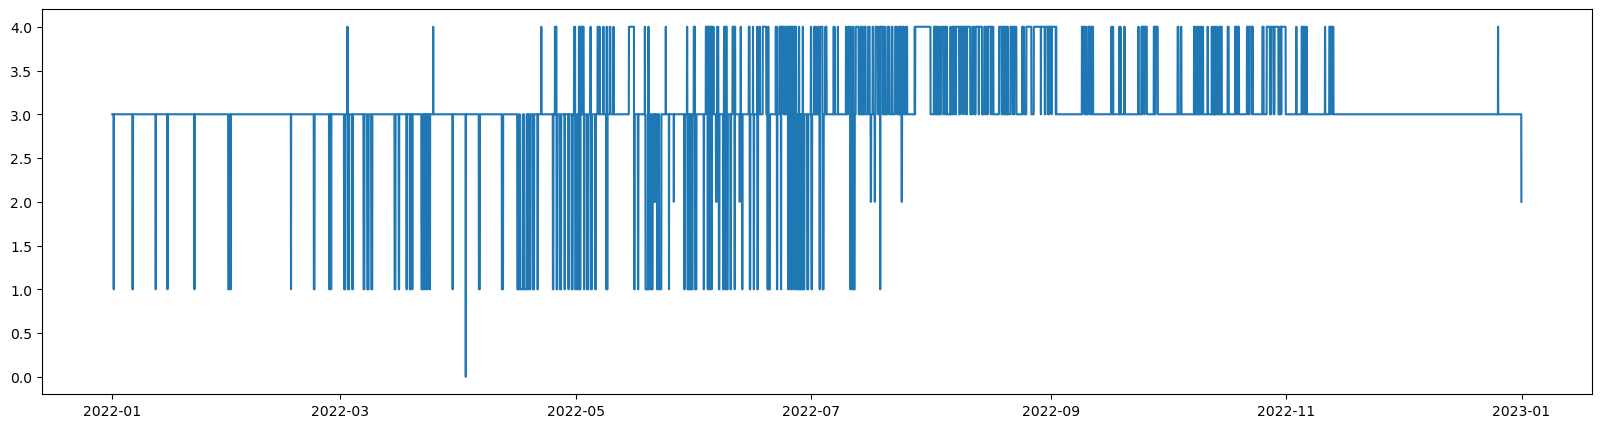

In [77]:
plt.figure(figsize=(20,5))
plt.plot(df_simp.index, df_simp['max_surplus_country_code'])
plt.show()


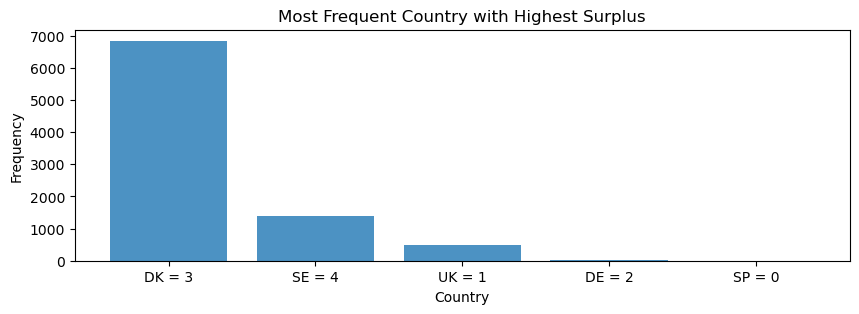

In [109]:
country_codes_dict = {'SP': 0, 'UK': 1, 'DE': 2, 'DK': 3, 'SE': 4, 'HU': 5, 'IT': 6, 'PO': 7, 'NL': 8}

# Count the occurrences of each country
country_counts = df_simp['max_surplus_country_name'].value_counts()
# Sort the countries based on their counts
sorted_countries = country_counts.sort_values(ascending=False).index
labels = [f"{country} = {country_codes_dict[country]}" for country in sorted_countries]

# Plot a bar plot
plt.figure(figsize=(10, 3))
plt.bar(range(len(sorted_countries)), country_counts[sorted_countries], align='center', alpha=0.8)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Most Frequent Country with Highest Surplus')
plt.xticks(range(len(sorted_countries)), labels)
plt.show()

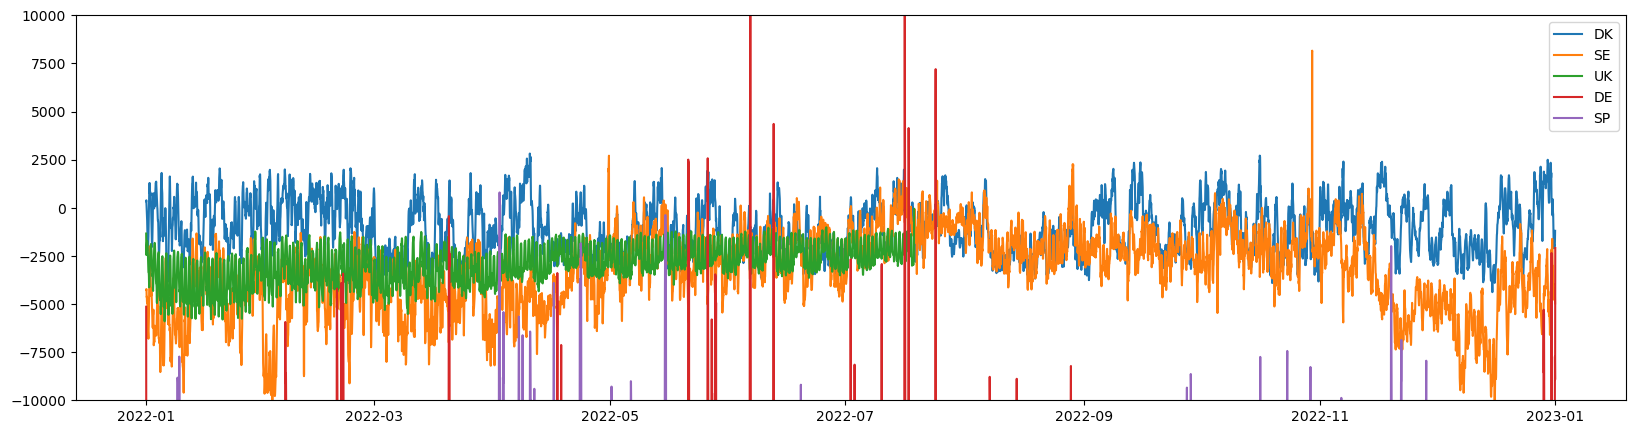

In [84]:
plt.figure(figsize=(20,5))

for country in sorted_countries :

    # if country in ['DE', 'SP'] :
    #     continue

    col_name = f"{country}_green_surplus_MAW"
    data = df_simp[col_name].dropna()

    plt.plot(data, label=country)

plt.ylim((-10000,10000))
plt.legend()
plt.show()

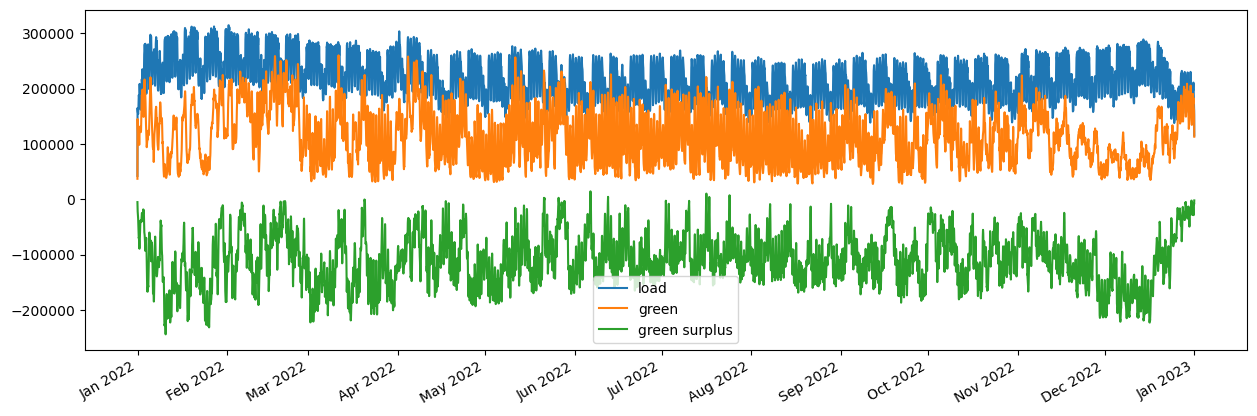

In [8]:
plt.figure(figsize=(15,5))

# plt.plot(df_simp['UK_load_MAW'])
# plt.plot(df_simp['UK_green_MAW'])
# plt.plot(df_simp['UK_green_surplus_MAW'])

plt.plot(df_simp['DE_load_MAW'], label='load')
plt.plot(df_simp['DE_green_MAW'], label='green')
plt.plot(df_simp['DE_green_surplus_MAW'], label='green surplus')

# Set x-axis locator and formatter for monthly labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

### SARIMA Test

In [50]:
data_name = 'DE_green_surplus_MAW'
data = df_simp[data_name] - df_simp[data_name].mean()
data = data.asfreq('H')

# We could also fit a more complicated model with seasonal components.
# As an example, here is an SARIMA(1,1,1) x (0,1,1,4):

# seasonal order = (P,D,Q,s)
mod_sarimax = sm.tsa.SARIMAX(data, order=(3,0,3), seasonal_order=(0,1,1,4), trend=(1,1,0,0))
res_sarimax = mod_sarimax.fit(disp=False)

# Show the summary of results
print(res_sarimax.summary())

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                DE_green_surplus_MAW   No. Observations:                 8761
Model:             SARIMAX(3, 0, 3)x(0, 1, [1], 4)   Log Likelihood              -87596.713
Date:                             Mon, 20 Nov 2023   AIC                         175213.425
Time:                                     19:08:40   BIC                         175284.201
Sample:                                 12-31-2021   HQIC                        175237.541
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -16.0001      3.774     -4.240      0.000     -23.396      -8.604
drift          0.0029      

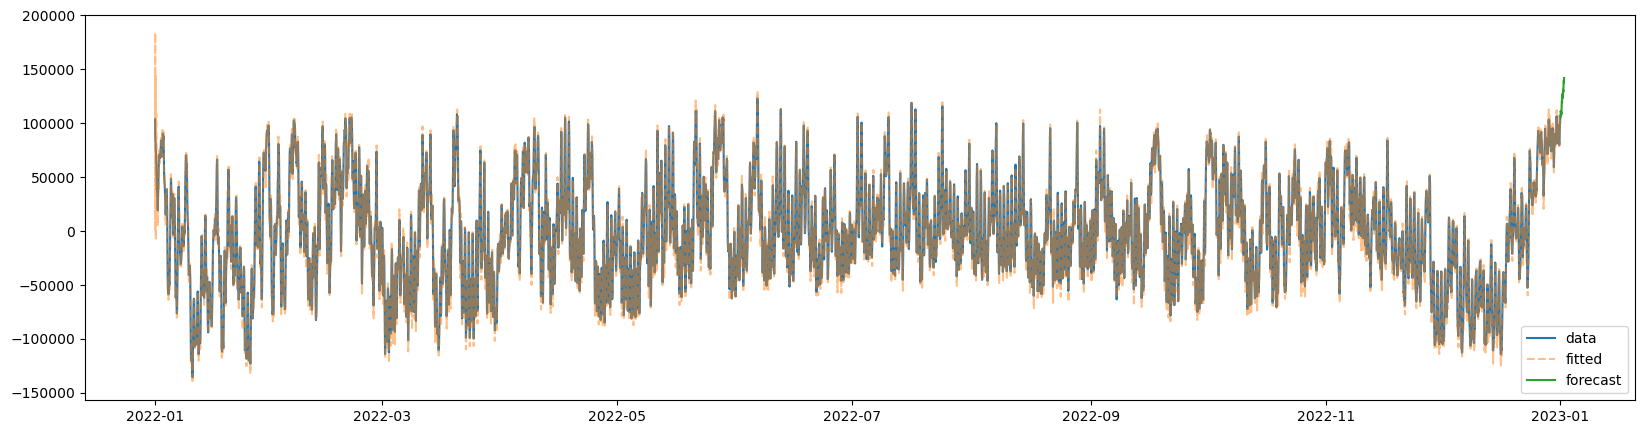

In [48]:
# plot fitted in sample and forecast out of sample

fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(111)
ax.plot(data, label='data')
ax.plot(res_sarimax.fittedvalues, label='fitted', alpha=0.5, linestyle='--')
ax.plot(res_sarimax.forecast(24), label='forecast')
ax.legend()

plt.show()

### ARIMA Find best (p,q)

In [25]:
data_name = 'DE_green_surplus_MAW'
data = df_simp[data_name] - df_simp[data_name].mean()
data = data.asfreq('H')

# plt.figure(figsize=(20,5))
# plt.plot(data)

# # Set x-axis locator and formatter for monthly labels
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# # Rotate x-axis labels for better readability
# plt.gcf().autofmt_xdate()
# plt.show()

p=0, q=0
p=0, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=1, q=0
p=1, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3
p=2, q=4
p=2, q=5
p=3, q=0
p=3, q=1
p=3, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p=3, q=3
p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=3
p=4, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=0
p=5, q=1
p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q            BIC            AIC
0   0  0  283911.147588  283896.991457
1   0  1  201706.556421  201685.322225
2   0  2  192518.578575  192490.266314
3   0  3  202507.105939  202471.715612
4   0  4  182464.288305  182421.819913
5   0  5  196340.873140  196291.326683
6   1  0  185850.907776  185829.673580
7   1  1  179281.356286  179253.044025
8   1  2  176672.913528  176637.523202
9   1  3  176499.804489  176457.336097
10  1  4  176278.616412  176229.069955
11  1  5  176348.241706  176291.617183
12  2  0  176680.050966  176651.738704
13  2  1  175567.987816  175532.597490
14  2  2  175367.472664  175325.004272
15  2  3  175268.498752  175218.952295
16  2  4  175221.491742  175164.867219
17  2  5  175348.803707  175285.101119
18  3  0  175069.423323  175034.032996
19  3  1  174591.274490  174548.806098
20  3  2  174567.584691  174518.038234
21  3  3  174438.940461  174382.315938
22  3  4  173596.816370  173533.113782
23  3  5  173308.879152  173238.098499
24  4  0  174875.771691  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


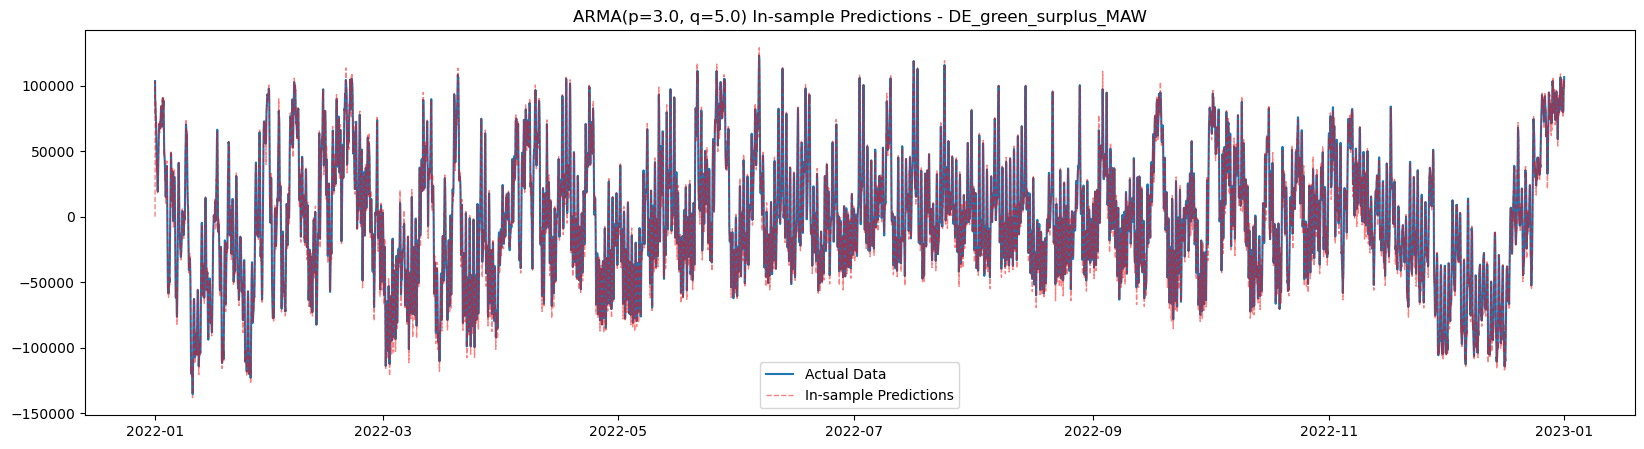

In [49]:
p_vals = range(6)
q_vals = range(6)

# Create dataframe to store results
results = []

# Loop through p and q values
for p_val in p_vals:
    for q_val in q_vals:

        print(f"p={p_val}, q={q_val}")

        # Fit ARIMA model
        order = (p_val, 0, q_val)  # replace p, d, q with appropriate values

        model = ARIMA(data, order=order, freq='H')
        
        fit_model = model.fit()

        # Get BIC and AIC values
        bic = fit_model.bic
        aic = fit_model.aic

        # Save results in the dataframe
        results.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic})

results_df = pd.DataFrame(results)
print(results_df)

# Find the best p and q based on lowest combined AIC and BIC
best_params = results_df.loc[results_df['AIC'].idxmin()]
print('-'*30)
print(f"Best p = {best_params['p']}, best q = {best_params['q']}")

# Use the best parameters to fit the final model
best_order = (best_params['p'], 0, best_params['q'])
final_model = ARIMA(data, order=best_order, freq='H')
final_fit = final_model.fit()

# In-sample predictions
predictions = final_fit.predict()

# Plot the original data and predictions
plt.figure(figsize=(20, 5))
plt.plot(data, label='Actual Data')
plt.plot(predictions, label='In-sample Predictions', color='red', lw=1, linestyle='--', alpha=0.5)
plt.title(f"ARMA(p={best_params['p']}, q={best_params['q']}) In-sample Predictions - {data_name}")
plt.legend()
plt.show()

### ARIMA on all Green Surplus Time Series

In [51]:
relevant_cols = [col for col in df_main.columns if ('green_surplus' in col)]
df_green_surplus= df_main[relevant_cols]

print(len(df_green_surplus))
print(df_green_surplus.columns)

8761
Index(['SP_green_surplus_MAW', 'DE_green_surplus_MAW', 'SE_green_surplus_MAW',
       'NE_green_surplus_MAW', 'DK_green_surplus_MAW', 'PO_green_surplus_MAW',
       'HU_green_surplus_MAW', 'IT_green_surplus_MAW', 'UK_green_surplus_MAW'],
      dtype='object')


In [52]:
p_vals = range(6)
q_vals = range(6)

all_res = []

for idx, data_name in enumerate(relevant_cols) :

    print('= '*30)
    print(f"start {data_name} {idx+1}/{len(relevant_cols)}")

    # demean data
    data = df_green_surplus[data_name] - df_green_surplus[data_name].mean()
    # set frequency to hourly
    data = data.asfreq('H')

    # Create dataframe to store results
    results = []

    # Loop through p and q values
    for p_val in p_vals:
        for q_val in q_vals:

            print(f"p={p_val}, q={q_val}")

            # Fit ARIMA model
            order = (p_val, 0, q_val)  # replace p, d, q with appropriate values
            model = ARIMA(data, order=order, freq='H')
            fit_model = model.fit()

            # Get BIC and AIC values
            bic = fit_model.bic
            aic = fit_model.aic

            # Save results in the dataframe
            results.append({'country' : data_name, 'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic, 'IC_comb' : bic+aic})

    results_df = pd.DataFrame(results)
    print(results_df)

    # Find the best p and q based on lowest combined AIC and BIC
    best_params = results_df.loc[results_df['IC_comb'].idxmin()]
    print('-'*30)
    print(f"Best p = {best_params['p']}, best q = {best_params['q']}")
    print('-'*30)

    # save best params p and q in dataframe for each loop iteration
    all_res.append(best_params)

all_res_df = pd.DataFrame(all_res)

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
start SP_green_surplus_MAW 1/9
p=0, q=0


p=0, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=1, q=0
p=1, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3
p=2, q=4
p=2, q=5
p=3, q=0
p=3, q=1
p=3, q=2
p=3, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=4, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=0
p=5, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q            BIC            AIC
0   0  0  268245.972085  268231.815955
1   0  1  186181.893350  186160.659154
2   0  2  177455.512084  177427.199822
3   0  3  171808.679422  171773.289095
4   0  4  169400.624824  169358.156432
5   0  5  175666.306986  175616.760528
6   1  0  173872.944512  173851.710316
7   1  1  167391.708884  167363.396623
8   1  2  165497.926234  165462.535908
9   1  3  165388.613564  165346.145172
10  1  4  165169.271313  165119.724856
11  1  5  165172.062954  165115.438431
12  2  0  167418.147121  167389.834860
13  2  1  165386.810068  165351.419741
14  2  2  165183.421096  165140.952704
15  2  3  165399.254550  165349.708092
16  2  4  165026.926346  164970.301823
17  2  5  164962.266649  164898.564061
18  3  0  165215.658525  165180.268199
19  3  1  165109.263918  165066.795526
20  3  2  164814.192537  164764.646080
21  3  3  164808.559786  164751.935264
22  3  4  163697.702373  163633.999785
23  3  5  164584.984982  164514.204329
24  4  0  165153.359147  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=1, q=0
p=1, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3
p=2, q=4
p=2, q=5
p=3, q=0
p=3, q=1
p=3, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p=3, q=3
p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=3
p=4, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=0
p=5, q=1
p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q            BIC            AIC
0   0  0  283911.147588  283896.991457
1   0  1  201706.556421  201685.322225
2   0  2  192518.578575  192490.266314
3   0  3  202507.105939  202471.715612
4   0  4  182464.288305  182421.819913
5   0  5  196340.873140  196291.326683
6   1  0  185850.907776  185829.673580
7   1  1  179281.356286  179253.044025
8   1  2  176672.913528  176637.523202
9   1  3  176499.804489  176457.336097
10  1  4  176278.616412  176229.069955
11  1  5  176348.241706  176291.617183
12  2  0  176680.050966  176651.738704
13  2  1  175567.987816  175532.597490
14  2  2  175367.472664  175325.004272
15  2  3  175268.498752  175218.952295
16  2  4  175221.491742  175164.867219
17  2  5  175348.803707  175285.101119
18  3  0  175069.423323  175034.032996
19  3  1  174591.274490  174548.806098
20  3  2  174567.584691  174518.038234
21  3  3  174438.940461  174382.315938
22  3  4  173596.816370  173533.113782
23  3  5  173308.879152  173238.098499
24  4  0  174875.771691  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=0
p=1, q=1
p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=2, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=2, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=0
p=3, q=1
p=3, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=3, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=4, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=4, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=5, q=0
p=5, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=5, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q            BIC            AIC
0   0  0  228996.742326  228982.586195
1   0  1  147623.271243  147602.037047
2   0  2  140509.164944  140480.852683
3   0  3  136411.795391  136376.405064
4   0  4  133919.603757  133877.135365
5   0  5  132420.128939  132370.582482
6   1  0  130269.610265  130248.376069
7   1  1  128661.579962  128633.267701
8   1  2  128595.061865  128559.671539
9   1  3  128595.825666  128553.357274
10  1  4  128603.428052  128553.881595
11  1  5  128608.945287  128552.320765
12  2  0  128652.145302  128623.833040
13  2  1  128587.017146  128551.626819
14  2  2  128595.746099  128553.277707
15  2  3  128603.951081  128554.404624
16  2  4  128610.840658  128554.216135
17  2  5  128386.458465  128322.755877
18  3  0  128592.097989  128556.707662
19  3  1  128595.558717  128553.090325
20  3  2  128605.163543  128555.617085
21  3  3  128613.832595  128557.208073
22  3  4  128618.946667  128555.244079
23  3  5  128669.828670  128599.048016
24  4  0  128598.207236  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=0
p=1, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3
p=2, q=4
p=2, q=5
p=3, q=0
p=3, q=1
p=3, q=2
p=3, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=0
p=5, q=1
p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q            BIC            AIC
0   0  0  254340.468133  254326.312002
1   0  1  172695.930362  172674.696166
2   0  2  164140.592301  164112.280040
3   0  3  158862.959967  158827.569641
4   0  4  155705.167788  155662.699396
5   0  5  153834.275716  153784.729259
6   1  0  162024.350683  162003.116487
7   1  1  155661.868067  155633.555806
8   1  2  153035.035134  152999.644808
9   1  3  152357.576870  152315.108478
10  1  4  152024.850067  151975.303610
11  1  5  152014.889230  151958.264707
12  2  0  153302.021176  153273.708914
13  2  1  152226.832567  152191.442240
14  2  2  151998.556588  151956.088196
15  2  3  151991.423753  151941.877296
16  2  4  151973.781036  151917.156513
17  2  5  151980.575212  151916.872624
18  3  0  151899.700610  151864.310284
19  3  1  151873.066151  151830.597759
20  3  2  151739.521653  151689.975195
21  3  3  151862.238616  151805.614093
22  3  4  151086.000969  151022.298381
23  3  5  150974.390866  150903.610212
24  4  0  151889.491944  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=0
p=1, q=1
p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3
p=2, q=4
p=2, q=5
p=3, q=0
p=3, q=1
p=3, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=4, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=5
p=5, q=0
p=5, q=1
p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=4
p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q            BIC            AIC
0   0  0  222025.279819  222011.123688
1   0  1  140560.131593  140538.897397
2   0  2  133208.766905  133180.454644
3   0  3  128647.067613  128611.677287
4   0  4  125969.213164  125926.744772
5   0  5  124080.426727  124030.880269
6   1  0  123246.606501  123225.372305
7   1  1  121051.437158  121023.124896
8   1  2  120609.800941  120574.410614
9   1  3  120529.830584  120487.362192
10  1  4  120497.656800  120448.110343
11  1  5  120504.317993  120447.693470
12  2  0  120500.621022  120472.308760
13  2  1  120506.089559  120470.699233
14  2  2  120507.470926  120465.002534
15  2  3  120509.917568  120460.371110
16  2  4  120546.780925  120490.156402
17  2  5  120481.919329  120418.216741
18  3  0  120505.564562  120470.174235
19  3  1  120518.334008  120475.865616
20  3  2  120470.820238  120421.273781
21  3  3  120211.821436  120155.196914
22  3  4  119928.251055  119864.548467
23  3  5  119967.912944  119897.132291
24  4  0  120501.126110  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=0
p=1, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3
p=2, q=4
p=2, q=5
p=3, q=0
p=3, q=1
p=3, q=2
p=3, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=0
p=5, q=1
p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q            BIC            AIC
0   0  0  237914.048608  237899.892477
1   0  1  155845.714930  155824.480734
2   0  2  147368.698882  147340.386621
3   0  3  141632.680688  141597.290362
4   0  4  139123.713282  139081.244890
5   0  5  136049.946322  136000.399864
6   1  0  142292.461970  142271.227774
7   1  1  135975.536917  135947.224656
8   1  2  134235.967598  134200.577271
9   1  3  133247.059086  133204.590694
10  1  4  133223.950179  133174.403722
11  1  5  133171.018705  133114.394182
12  2  0  134296.785915  134268.473653
13  2  1  133373.558119  133338.167792
14  2  2  133286.860920  133244.392528
15  2  3  133197.621296  133148.074838
16  2  4  133188.302805  133131.678282
17  2  5  133126.557089  133062.854501
18  3  0  133192.337071  133156.946744
19  3  1  133165.850664  133123.382272
20  3  2  132943.256992  132893.710534
21  3  3  133162.492124  133105.867601
22  3  4  132045.387607  131981.685019
23  3  5  132092.536827  132021.756174
24  4  0  133191.085224  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=1, q=0
p=1, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3
p=2, q=4
p=2, q=5
p=3, q=0
p=3, q=1
p=3, q=2
p=3, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=0
p=5, q=1
p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q            BIC            AIC
0   0  0  239350.334779  239336.178649
1   0  1  157825.424544  157804.190348
2   0  2  148951.641486  148923.329225
3   0  3  143780.486108  143745.095782
4   0  4  140421.867285  140379.398893
5   0  5  139387.837625  139338.291168
6   1  0  147936.160714  147914.926518
7   1  1  141273.885110  141245.572849
8   1  2  138411.990277  138376.599950
9   1  3  137476.561835  137434.093443
10  1  4  137183.552319  137134.005861
11  1  5  137156.927716  137100.303193
12  2  0  138732.498615  138704.186353
13  2  1  137362.679453  137327.289127
14  2  2  137110.539018  137068.070626
15  2  3  137084.083732  137034.537275
16  2  4  137082.216692  137025.592169
17  2  5  137087.876547  137024.173959
18  3  0  136993.311795  136957.921469
19  3  1  136997.529611  136955.061219
20  3  2  136693.720268  136644.173811
21  3  3  136629.789587  136573.165064
22  3  4  136149.432806  136085.730218
23  3  5  135952.280915  135881.500262
24  4  0  136998.969139  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=0
p=1, q=1
p=1, q=2
p=1, q=3
p=1, q=4
p=1, q=5
p=2, q=0
p=2, q=1
p=2, q=2
p=2, q=3
p=2, q=4
p=2, q=5
p=3, q=0
p=3, q=1
p=3, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=3, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=0
p=4, q=1
p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=4, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


LinAlgError: LU decomposition error.

In [124]:
all_res_df = pd.DataFrame(all_res)
all_res_df

,p,q,BIC,AIC
35,5.0,5.0,163560.617130,163475.680346
23,3.0,5.0,173308.879152,173238.098499
33,5.0,3.0,128335.967530,128265.186877
23,3.0,5.0,150974.390866,150903.610212
34,5.0,4.0,119940.973620,119863.114901
28,4.0,4.0,131902.318337,131831.537684
29,4.0,5.0,135938.464398,135860.605680


### Try TBATS

In [167]:
from tbats import TBATS
import numpy as np

y = df_simp['DE_green_MAW'][:50]

# Create estimator
estimator = TBATS(
    seasonal_periods = [24],
    use_arma_errors = False,  # shall try only models without ARMA
    use_box_cox = False  # will not use Box-Cox
)

fitted_model = estimator.fit(y)

Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: []
Seasonal harmonics []
ARMA errors (p, q): (0, 0)
Smoothing (Alpha): 0.528893
Seasonal Parameters (Gamma): []
AR coefficients []
MA coefficients []
Seed vector [118366.06244538]

AIC 1179.542241
[118366.06244538  75360.65158835 112275.4776239  126093.09323774
 129543.54428112 128204.0983976  123461.98838616 121028.02723262
 117423.07560876 113170.73291227 113262.37272648 114467.52358775
 116310.44006562 117952.42123659 115240.03323788 110244.61776399
 104040.37178405 105533.24113791 111994.60392228 119730.40785792
 125701.39830973 127444.42019909 128851.58322036 130169.80593433
 129491.33837864 128147.7702486  127059.42920388 125437.61512352
 125028.98410591 123148.24768284 122703.31735953 123818.58563084
 129353.67392155 137996.4929673  147919.32967779 159890.12788578
 172063.59898154 180773.62712076 184490.35805622 185410.44314921
 185653.49972146 188210.96376706 192015.31295221 195410.11398605
 194505.64

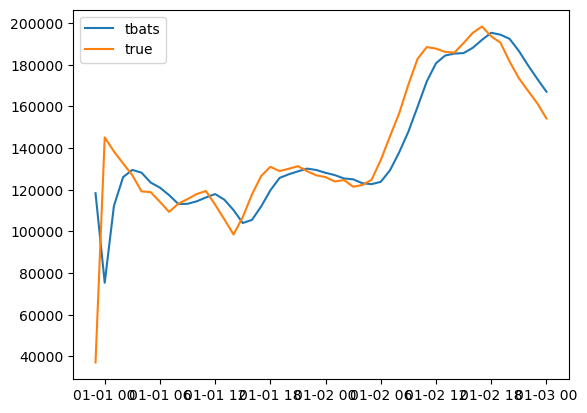

In [177]:
plt.plot(y.index, fitted_model.y_hat, label='tbats')
plt.plot(y.index, y, label='true')
plt.legend()
plt.show()

In [ ]:
# Forecast 14 steps ahead
y_forecasted = fitted_model.forecast(steps=14)

# Summarize fitted model
print(fitted_model.summary())

print(fitted_model.y_hat) # in sample prediction
print(fitted_model.resid) # in sample residuals
print(fitted_model.aic)

# Reading model parameters
print(fitted_model.params.alpha)
print(fitted_model.params.beta)
print(fitted_model.params.x0)
print(fitted_model.params.components.use_box_cox)
print(fitted_model.params.components.seasonal_harmonics)

--- 

### Exploratory Analysis

In [52]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag="AIC")
    return dftest

def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    return kpsstest


In [56]:
dfs = []
cols = df_simp.columns

# Loop through columns
for col in cols:

    try :
        # Perform ADF test
        adf_result = adfuller(df_simp[col].dropna())
        adf_p_value = adf_result[1]
        adf_stationary = adf_p_value < 0.05  # Set the significance level as needed

        # Perform KPSS test
        kpss_result = kpss_test(df_simp[col].dropna())
        kpss_p_value = kpss_result[1]
        kpss_stationary = kpss_p_value < 0.05  # Set the significance level as needed

        # Append results to the new DataFrame
        df_temp = pd.DataFrame({'Power Type': [col], 
                                'adf_p_value': [adf_p_value], 
                                'adf_stationary': [adf_stationary], 
                                'kpss_p_value': [kpss_p_value], 
                                'kpss_stationary': [kpss_stationary]})
        
        dfs.append(df_temp)

    except Exception as e :
        print(f'Error for column {col}: {e}')

results = pd.concat(dfs, ignore_index=True)

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values ava

Error for column max_surplus_country_name: could not convert string to float: 'DK'


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


                          Power Type   adf_p_value  adf_stationary  \
0                        SP_load_MAW  1.841086e-14            True   
1                        SE_load_MAW  8.877247e-03            True   
2                        DK_load_MAW  8.488267e-11            True   
3                        PO_load_MAW  3.343831e-15            True   
4                        NE_load_MAW  1.209254e-11            True   
5                        UK_load_MAW  6.029358e-07            True   
6                        IT_load_MAW  4.188422e-20            True   
7                        DE_load_MAW  1.391079e-13            True   
8                        HU_load_MAW  8.734094e-13            True   
9                       SP_green_MAW  1.628220e-15            True   
10              SP_green_surplus_MAW  5.958646e-13            True   
11                      DE_green_MAW  5.550035e-12            True   
12              DE_green_surplus_MAW  5.344938e-15            True   
13                  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [60]:
results.head(20)

,Power Type,adf_p_value,adf_stationary,kpss_p_value,kpss_stationary
0,SP_load_MAW,1.841086e-14,True,0.010000,True
1,SE_load_MAW,8.877247e-03,True,0.010000,True
2,DK_load_MAW,8.488267e-11,True,0.010000,True
3,PO_load_MAW,3.343831e-15,True,0.010000,True
4,NE_load_MAW,1.209254e-11,True,0.010000,True
5,UK_load_MAW,6.029358e-07,True,0.010000,True
6,IT_load_MAW,4.188422e-20,True,0.010000,True
7,DE_load_MAW,1.391079e-13,True,0.010000,True
8,HU_load_MAW,8.734094e-13,True,0.010000,True
9,SP_green_MAW,1.628220e-15,True,0.100000,False


In [158]:
data = df_simp['DE_load_MAW']
data = df_main['DE_B16_MAW']

In [89]:
from pmdarima import auto_arima

# Use auto_arima to find the optimal (p, d, q) values
# model = auto_arima(data, suppress_warnings=True, seasonal=False)
# order = model.get_params()['order']
# print(order)

In [159]:
# Fit ARIMA model
order = (0, 0, 7)  # replace p, d, q with appropriate values

model = ARIMA(data, order=order, freq='H')
fit_model = model.fit()

# Get BIC and AIC values
bic = fit_model.bic
aic = fit_model.aic

print(f"BIC: {bic}")
print(f"AIC: {aic}")

# In-sample predictions
predictions = fit_model.predict()

# Plot the original data and predictions
plt.figure(figsize=(20, 5))

plt.plot(data, label='Actual Data')
plt.plot(predictions, label='In-sample Predictions', color='red', lw=1, linestyle='--', alpha=0.5)

plt.title('ARIMA In-sample Predictions')
plt.xlabel('Time')
plt.ylabel('DE_load_MAW')

plt.legend()
plt.show()

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC: 184014.81854609592
AIC: 183951.11595810193


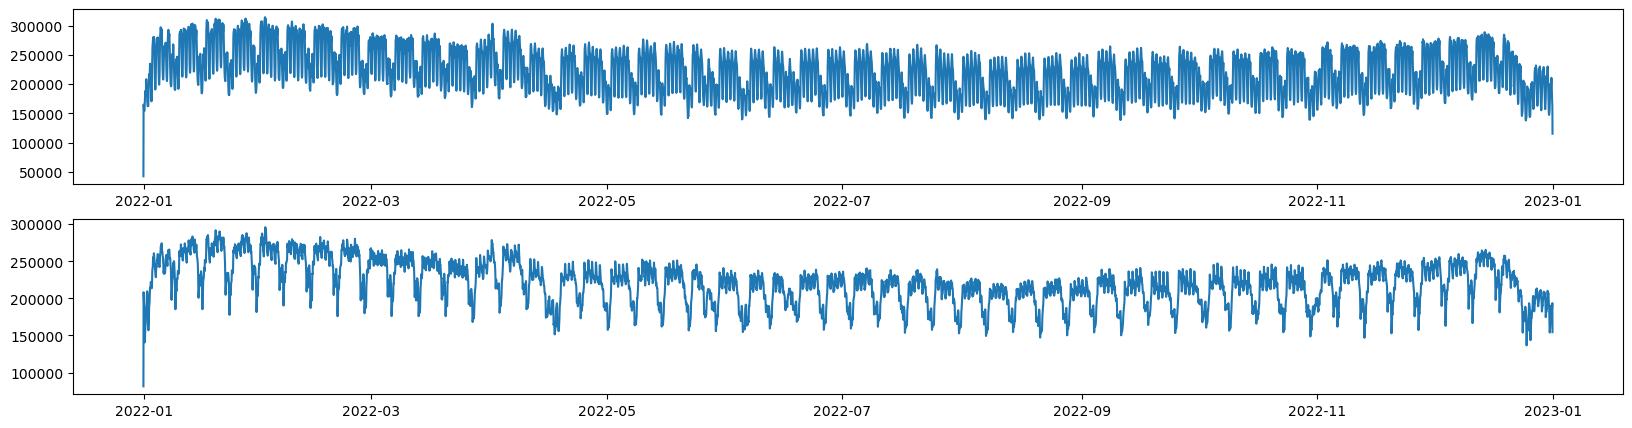

In [81]:
# weekdays, set period to 7
# hourly, set period to 24
# weekly, set period to 52
# daily, set period to 365

decomposition_weekly = seasonal_decompose(data, model='additive', period=52)
decomposition_hourly = seasonal_decompose(data, model='additive', period=24)
decomposition_weekday = seasonal_decompose(data, model='additive', period=7)
decomposition_yearly = seasonal_decompose(data, model='additive', period=1)

deseasoned_data = data - decomposition_hourly.seasonal

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(211)
ax1.plot(data)

ax2 = fig.add_subplot(212)
ax2.plot(deseasoned_data)

plt.show()

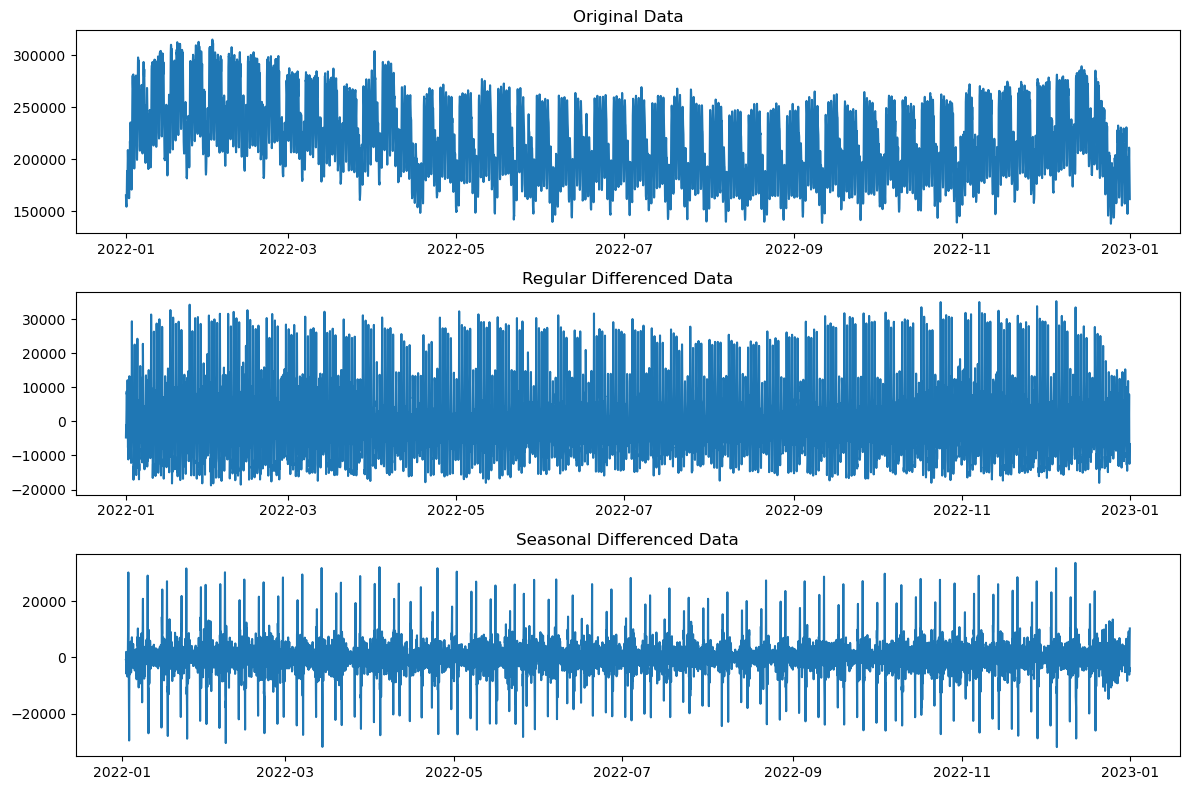

In [98]:
# Regular Differencing (to remove trends)
data_diff = data.diff().dropna()

# Seasonal Differencing (e.g., for weekly seasonality)
# Assuming you have daily data and want to remove the weekly pattern
seasonal_diff = data_diff.diff(periods=7).diff(periods=24).dropna()

# Plot the original data, regular differenced data, and seasonal differenced data
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(data, label='Original Data')
plt.title('Original Data')

plt.subplot(312)
plt.plot(data_diff, label='Regular Differenced Data')
plt.title('Regular Differenced Data')

plt.subplot(313)
plt.plot(seasonal_diff, label='Seasonal Differenced Data')
plt.title('Seasonal Differenced Data')

plt.tight_layout()
plt.show()

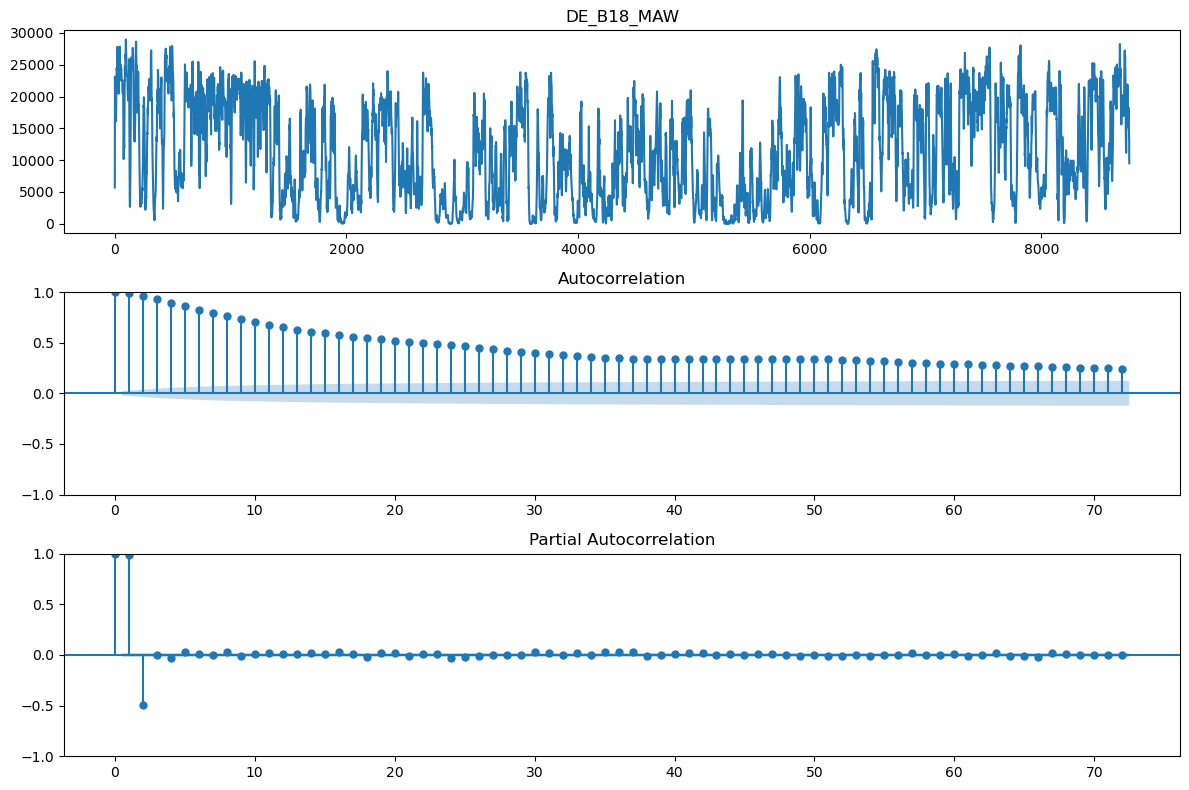

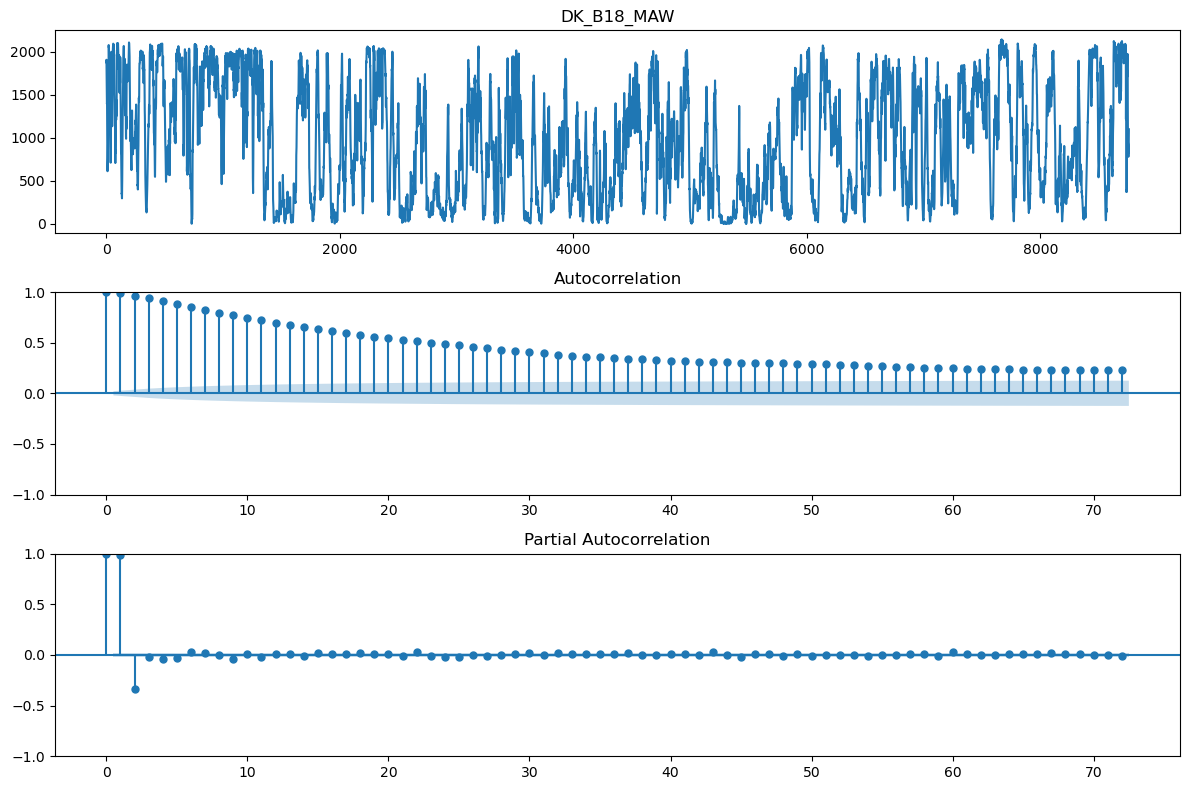

In [126]:
# data = df_main['DE_load_MAW']
# data = df_main['DE_B16_MAW'].dropna()

# data = df_simp['DK_load_MAW'].dropna()
# data = df_simp['DK_green_MAW'].dropna()

pwr_types = ['DE_B18_MAW', 'DK_B18_MAW']

for pwr_type in pwr_types :

    data = df_main[pwr_type].dropna()

    fig = plt.figure(figsize=(12, 8))

    ax1 = fig.add_subplot(311)
    ax1.plot(data)
    ax1.set_title(pwr_type)

    ax2 = fig.add_subplot(312)
    fig = sm.graphics.tsa.plot_acf(data.squeeze(), lags=72, ax=ax2)

    ax3 = fig.add_subplot(313)
    fig = sm.graphics.tsa.plot_pacf(data, lags=72, ax=ax3)

    plt.tight_layout()
    

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


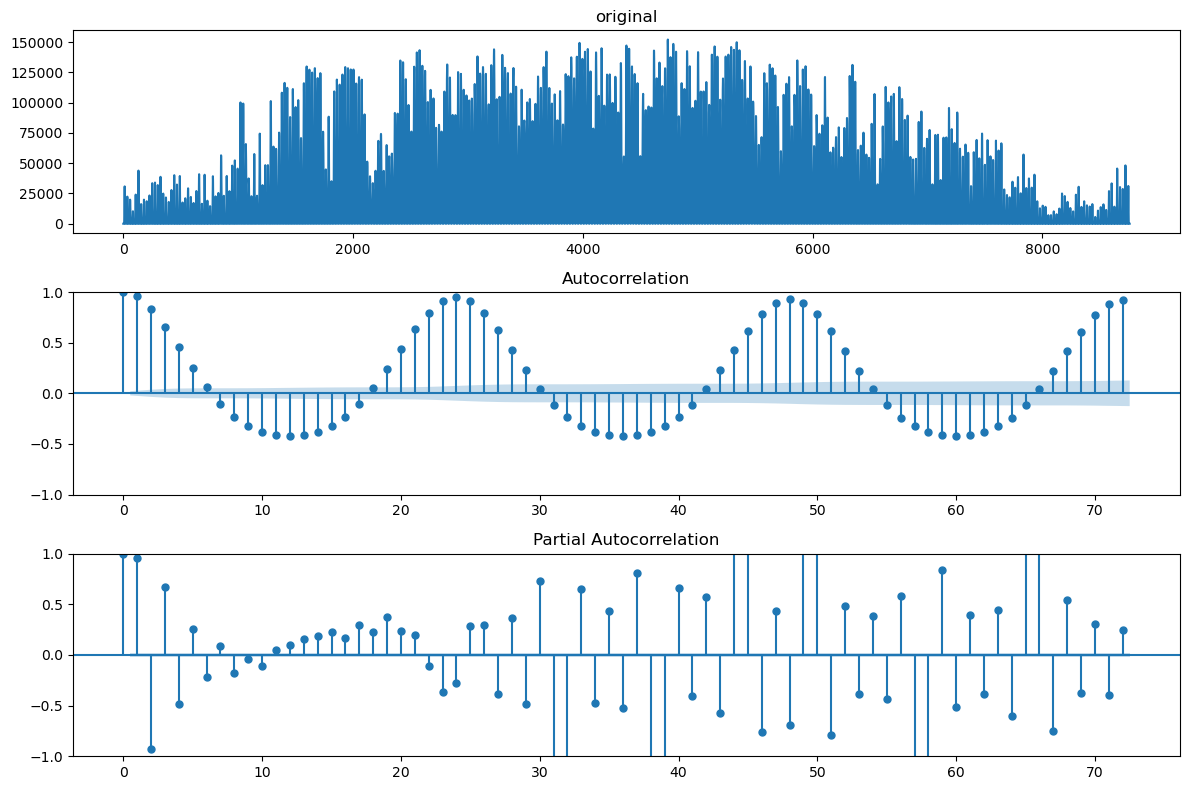

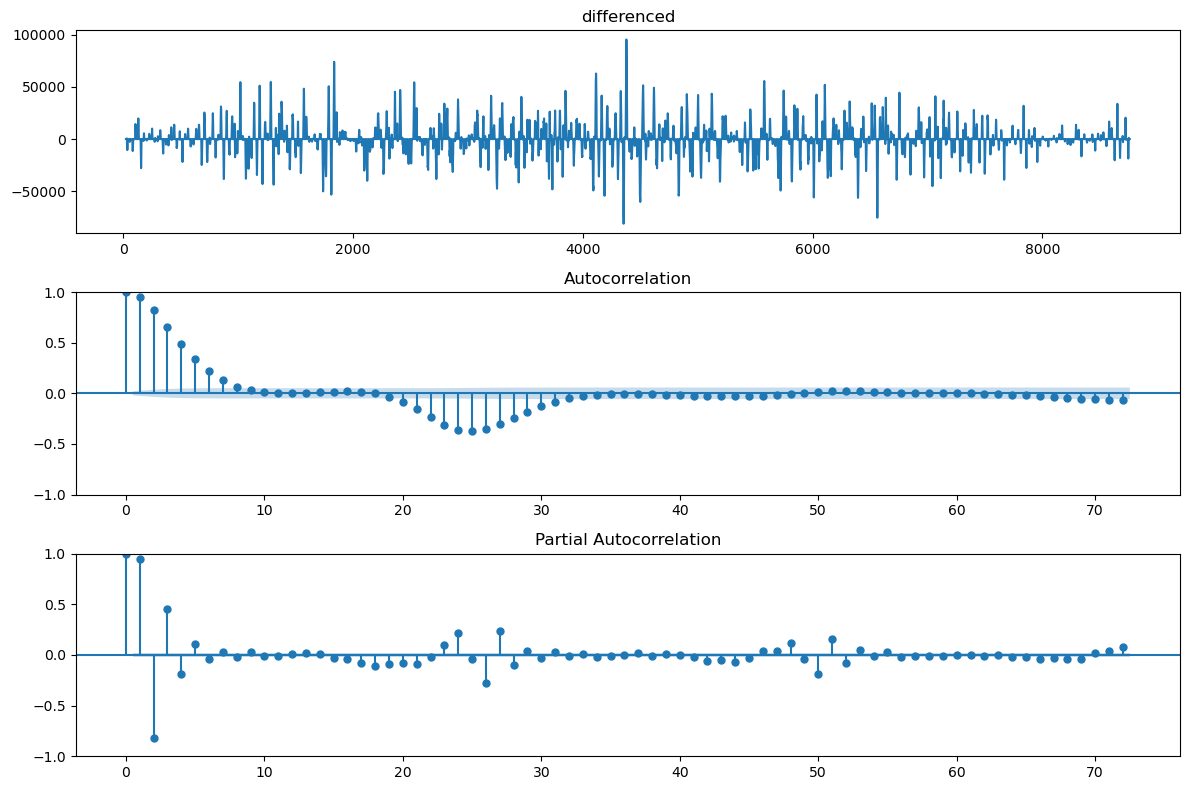

In [127]:
data = df_main['DE_B16_MAW'].dropna()
seasonal_diff = data.diff(periods=24).dropna()

data_list = [data, seasonal_diff]

for idx, data in enumerate(data_list) :

    fig = plt.figure(figsize=(12, 8))

    ax1 = fig.add_subplot(311)
    ax1.plot(data)
    
    if (idx == 0) :
        ax1.set_title('original')
    if (idx == 1) :
        ax1.set_title('differenced')

    ax2 = fig.add_subplot(312)
    fig = sm.graphics.tsa.plot_acf(data.squeeze(), lags=72, ax=ax2)

    ax3 = fig.add_subplot(313)
    fig = sm.graphics.tsa.plot_pacf(data, lags=72, ax=ax3)

    plt.tight_layout()
    

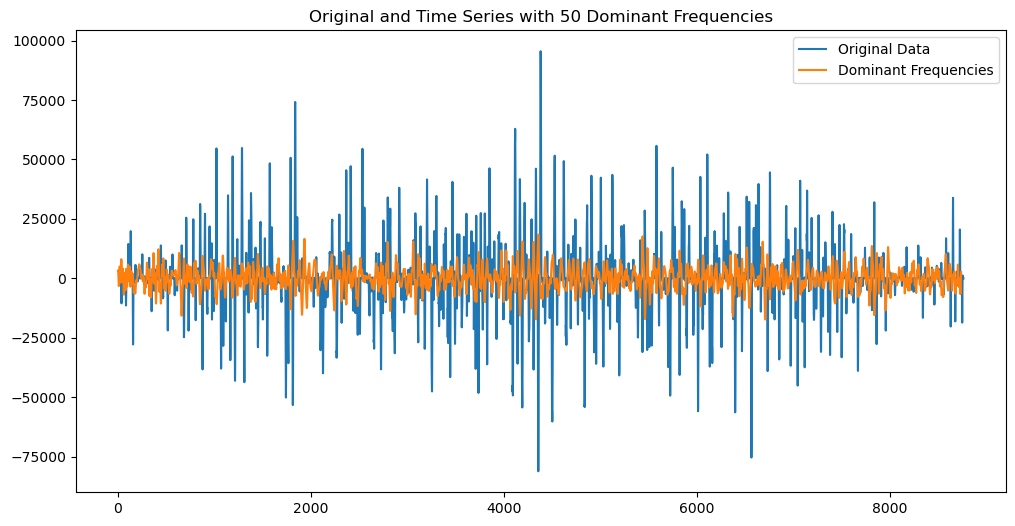

In [150]:
data = df_main['DE_B16_MAW'].diff(periods=24).dropna()

# Calculate the FFT
fft_result = np.fft.fft(data)
n = len(data)
frequencies = np.fft.fftfreq(n)

# Find the indices of the frequencies with the highest amplitude
num_peaks = 50
indices_of_peaks = np.argsort(np.abs(fft_result))[::-1][:num_peaks]  # Set num_peaks to the desired number of dominant frequencies

# Extract the frequencies and corresponding amplitudes
dominant_frequencies = frequencies[indices_of_peaks]
dominant_amplitudes = np.abs(fft_result[indices_of_peaks])

# Inverse FFT to get the time series corresponding to the dominant frequencies
filtered_fft_result = np.zeros_like(fft_result)
filtered_fft_result[indices_of_peaks] = fft_result[indices_of_peaks]
filtered_data = np.fft.ifft(filtered_fft_result).real

# Plot the original and filtered time series
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(filtered_data, label='Dominant Frequencies')
plt.title(f'Original and Time Series with {num_peaks} Dominant Frequencies')
plt.legend()
plt.show()